# This code analyses the life expectancy based on a number of factors using Multivariate Linear Regression

In [2]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_968f57e168374f25bc4b3ded0df6c806 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FpudwCJrLnuerkYK3sj3HjlemX-6TMhWtgqJ8x3h9_z2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_968f57e168374f25bc4b3ded0df6c806.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-wwetorsib96zdh',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(100)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
import seaborn as sns
%matplotlib inline

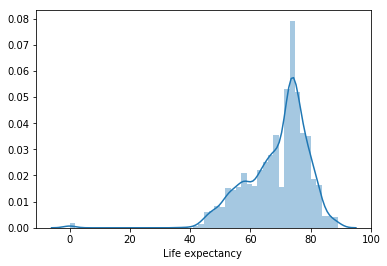

In [4]:
df = df.fillna(value = 0.0)
sns.distplot(df['Life expectancy '])

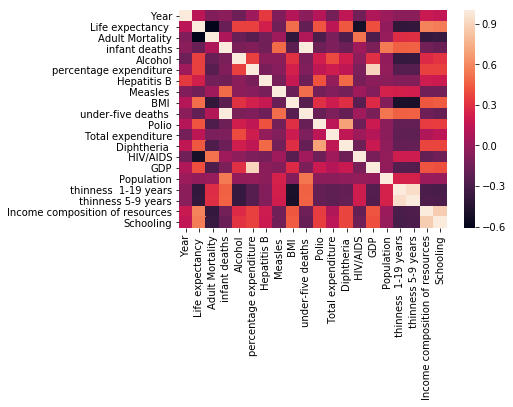

In [5]:
sns.heatmap(df.corr())
#GDP, Diptheria, Schooling, Alcohol, Percentage expenditure, Polio are factors which have high correlation with Life expectancy

In [6]:
#Storing the output variable i.e. as y and filling the empty variables with 0.0
y = df['Life expectancy ']
y = y.fillna(value = 0.0) 
y.shape

(2938,)

In [7]:
#Dropping the life expectacny and using df1 variables as the independant variables for our regression model, all countries are developing
df1 = df
df1 = df1.drop(df1.columns[3], axis=1)
df1 = df1.drop(df1.columns[0], axis=1)
df1 = df1.fillna(value = 0.0)
df1

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,2010,Developing,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,2009,Developing,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,2008,Developing,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,2007,Developing,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,2006,Developing,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [8]:
#Label encoding the data to convert Country and Status into numerical form
le = LabelEncoder()  
#df1['Country'] = le.fit_transform(df1['Country']) 
df1['Status'] = le.fit_transform(df1['Status'])
df1

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,2010,1,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,2009,1,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,2008,1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,2007,1,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,2006,1,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


# Model : Multivariate Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df1.iloc[:, 0:21]
X.shape

(2938, 20)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
prediction = model.predict(X_test)

In [13]:
prediction[:20]

array([58.03778496, 50.12569125, 69.65566504, 78.45108092, 65.22256544,
       70.75296413, 51.22820163, 73.82937738, 55.58442214, 75.03700473,
       71.47441306, 64.41308545, 66.85441684, 66.77770294, 81.65510064,
       50.98816368, 82.72611683, 66.24436774, 62.95485899, 61.6659671 ])

In [14]:
y_test[:20]

618     55.3
736     51.3
1111    65.9
2121    74.6
2117    67.6
2692    72.0
1773    51.2
1383    65.3
437     51.5
2812    76.8
305     74.0
967     59.3
1122    63.5
2889    73.4
2437    79.4
2390    58.0
2061    79.3
2703    65.6
204     66.8
2302    48.1
Name: Life expectancy , dtype: float64

In [15]:
#Minimum mean absolute error of 3.62 was calculated, MSE = 27.98, RMSE = 5.29
from sklearn import metrics
print(metrics.mean_absolute_error(prediction, y_test))
print(metrics.mean_squared_error(prediction, y_test))
print(np.sqrt(metrics.mean_squared_error(prediction, y_test)))

3.700174085647074
37.630935222527995
6.134405857336796


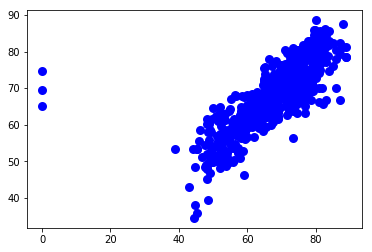

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(y_test, prediction, color='blue', linewidth=3)
plt.show()

After individually checking the impact of various factors in a multivariate Linear regression model the Minimum mean absolute error of 3.53 was calculated, RMSE = 5.62
It was found that factors such as the GDP, illnesses such as Diptheria, Alcohol , Schooling, significantly impacted the overall regression output
Other factors that less impacted the outcome were Country, Hepatitis B, Adult Mortality and Status

In [19]:
# @hidden_cell
wml_credentials={"apikey": "zCIEw5kCAoGVzKUWEbiGZTZ4wZZQEoRGZuyH7ua4PZSF",
  "instance_id": "00e8f65e-b832-4921-af77-c5f9cdc958c9",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [ ]:
# @hidden_cell

{
  "apikey": "zCIEw5kCAoGVzKUWEbiGZTZ4wZZQEoRGZuyH7ua4PZSF",
  "iam_apikey_description": "Auto-generated for key e930cc3c-4acb-446f-ac00-77c7196b76ba",
  "iam_apikey_name": "Service credentials-2",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/05171c9036d445ddae0d86c11aa1da14::serviceid:ServiceId-1b3b3f69-cd8f-4820-b717-7d0005b1b4f7",
  "instance_id": "00e8f65e-b832-4921-af77-c5f9cdc958c9",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [20]:
# @hidden_cell
client = WatsonMachineLearningAPIClient( wml_credentials )

In [21]:
# @hidden_cell
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shreya", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "singhshreya196@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Lifeexpectancyprediction"}

In [22]:
# @hidden_cell
model_artifact =client.repository.store_model(model, meta_props=model_props)

In [23]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [24]:
published_model_uid

'ab7ca729-9857-419d-aaf6-ae24193ec912'

In [25]:
deployment = client.deployments.create(published_model_uid, name="Lifeexpectancyprediction")



#######################################################################################

Synchronous deployment creation for uid: 'ab7ca729-9857-419d-aaf6-ae24193ec912' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2e4d4f05-29cd-490c-82af-41eb364e7b0a'
------------------------------------------------------------------------------------------------




In [26]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [27]:
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/00e8f65e-b832-4921-af77-c5f9cdc958c9/deployments/2e4d4f05-29cd-490c-82af-41eb364e7b0a/online'